In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from collections import Counter
import math 

In [2]:
#loading the necessary dataset
df_Address = #Address of ACLED dataset
conflict_df = pd.read_csv(df_Address)
#Adding new column with date format changed from 'String' to 'Datetime'
event_date_dt = []
for i in conflict_df.event_date:
    event_date_dt.append(dt.datetime.strptime(i, '%d %B %Y'))
conflict_df['event_date_dt'] = event_date_dt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#Defining reduced dataset
features = ["event_id_cnty", "event_date_dt", "event_type", "sub_event_type", "country", "fatalities", "admin1", 'iso3']
conflict = conflict_df[features]
conflict = conflict.dropna(axis = 0)
conflict["iso_admin"] = conflict.iso3 + '_' + conflict.admin1
conflict.head()

pop_data = pd.read_csv('E:/ML/Art/WPP2019_TotalPopulationBySex.csv')
pop_data = pop_data[['Location', 'Time', 'PopTotal']]


le = LabelEncoder()

conflict["sub_event_num"] = le.fit_transform(conflict['sub_event_type'])

dict_event = {l: i for (i, l) in enumerate(le.classes_)}
print(dict_event)

conflict.head()

{'Abduction/forced disappearance': 0, 'Agreement': 1, 'Air/drone strike': 2, 'Armed clash': 3, 'Arrests': 4, 'Attack': 5, 'Change to group/activity': 6, 'Chemical weapon': 7, 'Disrupted weapons use': 8, 'Excessive force against protesters': 9, 'Government regains territory': 10, 'Grenade': 11, 'Headquarters or base established': 12, 'Looting/property destruction': 13, 'Mob violence': 14, 'Non-state actor overtakes territory': 15, 'Non-violent transfer of territory': 16, 'Other': 17, 'Peaceful protest': 18, 'Protest with intervention': 19, 'Remote explosive/landmine/IED': 20, 'Sexual violence': 21, 'Shelling/artillery/missile attack': 22, 'Suicide bomb': 23, 'Violent demonstration': 24}


,event_id_cnty,event_date_dt,event_type,sub_event_type,country,fatalities,admin1,iso3,iso_admin,sub_event_num
0,IND92138,2021-04-02,Riots,Mob violence,India,0,Assam,IND,IND_Assam,14
1,YEM63870,2021-04-02,Explosions/Remote violence,Shelling/artillery/missile attack,Yemen,0,Al Hudaydah,YEM,YEM_Al Hudaydah,22
2,TUN8240,2021-04-02,Protests,Peaceful protest,Tunisia,0,Kasserine,TUN,TUN_Kasserine,18
3,IND92139,2021-04-02,Protests,Peaceful protest,India,0,West Bengal,IND,IND_West Bengal,18
4,YEM63871,2021-04-02,Battles,Armed clash,Yemen,10,Al Hudaydah,YEM,YEM_Al Hudaydah,3


In [6]:
country_total = np.zeros(30)
for year in range(1900, 2021):
    if year in set(conflict.event_date_dt.dt.year):
        conflict_year = conflict[conflict.event_date_dt.dt.year == year]
        pop_year = pop_data[pop_data['Time'] == year]
        
    
        list_country = list(set(conflict_year.country))

        grouped_year = conflict_year.groupby('country')
    

        for country in list_country:
            temp = grouped_year.get_group(country)
            fatal = sum(temp.fatalities)
            label = temp.iso3.max() + '_' + str(year)
            se_count = dict(Counter(temp.sub_event_num))
    
            temp_vector_event = np.zeros(25)
            for val_num in range(25):
                if val_num in se_count.keys():
                    temp_vector_event[val_num] = se_count.get(val_num)
                else:
                    temp_vector_event[val_num] = 0
            days_annual = len(set(temp.event_date_dt))
    
            temp_arr = np.array([country, year, label, days_annual, fatal])
    
            temp_arr = np.hstack((temp_arr, np.array(temp_vector_event).astype(int)))
        
            country_total = np.vstack((country_total, temp_arr))
    
    

features = ['Country', 'Year', 'Country Label', 'Days of Protest', 'Fatalities' ]
for key in dict_event.keys():
    features.append(key)
country_total = pd.DataFrame(country_total, columns = features)
country_total = country_total.drop(0)
country_total = country_total.reset_index(drop = True)

print(Counter(country_total.Year))


Counter({'2020': 190, '2018': 146, '2019': 146, '2017': 76, '2016': 73, '2015': 61, '2014': 58, '2010': 57, '2011': 57, '2012': 57, '2013': 57, '1997': 48, '1998': 48, '2000': 48, '2003': 48, '2004': 48, '2006': 48, '2009': 48, '2001': 47, '2002': 47, '2005': 47, '2007': 47, '2008': 47, '1999': 46})


In [7]:
country_total[['Days of Protest', 'Fatalities',\
       'Abduction/forced disappearance', 'Agreement', 'Air/drone strike',\
       'Armed clash', 'Arrests', 'Attack', 'Change to group/activity',\
       'Chemical weapon', 'Disrupted weapons use',\
       'Excessive force against protesters', 'Government regains territory',\
       'Grenade', 'Headquarters or base established',\
       'Looting/property destruction', 'Mob violence',\
       'Non-state actor overtakes territory',\
       'Non-violent transfer of territory', 'Other', 'Peaceful protest',\
       'Protest with intervention', 'Remote explosive/landmine/IED',\
       'Sexual violence', 'Shelling/artillery/missile attack', 'Suicide bomb',\
       'Violent demonstration']] = country_total[['Days of Protest', 'Fatalities',\
       'Abduction/forced disappearance', 'Agreement', 'Air/drone strike',\
       'Armed clash', 'Arrests', 'Attack', 'Change to group/activity',\
       'Chemical weapon', 'Disrupted weapons use',\
       'Excessive force against protesters', 'Government regains territory',\
       'Grenade', 'Headquarters or base established',\
       'Looting/property destruction', 'Mob violence',\
       'Non-state actor overtakes territory',\
       'Non-violent transfer of territory', 'Other', 'Peaceful protest',\
       'Protest with intervention', 'Remote explosive/landmine/IED',\
       'Sexual violence', 'Shelling/artillery/missile attack', 'Suicide bomb',\
       'Violent demonstration']].apply(pd.to_numeric)

In [8]:
country_total['Sum_Peace'] = country_total['Agreement'] + country_total['Arrests'] + country_total['Non-violent transfer of territory'] + country_total['Peaceful protest'] + country_total['Protest with intervention']

In [11]:
country_total['Sum_Protests'] = country_total['Abduction/forced disappearance'] + country_total['Agreement'] + country_total['Air/drone strike'] + \
       country_total['Armed clash'] + country_total['Arrests'] + country_total['Attack'] + country_total['Change to group/activity'] +\
       country_total['Chemical weapon'] + country_total['Disrupted weapons use'] +\
       country_total['Excessive force against protesters'] + country_total['Government regains territory'] +\
       country_total['Grenade'] + country_total['Headquarters or base established'] +\
       country_total['Looting/property destruction'] + country_total['Mob violence'] +\
       country_total['Non-state actor overtakes territory'] +\
       country_total['Non-violent transfer of territory'] + country_total['Other'] + country_total['Peaceful protest'] +\
       country_total['Protest with intervention'] + country_total['Remote explosive/landmine/IED'] +\
       country_total['Sexual violence'] + country_total['Shelling/artillery/missile attack'] + country_total['Suicide bomb'] +\
       country_total['Violent demonstration']

In [12]:
country_total['Year'] = country_total['Year'].astype('int64')

In [13]:
pop_df_address = #Address of World Bank Population CSV
pop_data = pd.read_csv(pop_df_address)
pop_data = pop_data[['Location', 'PopTotal', 'Time']]

In [14]:
country_total = country_total.merge(pop_data, left_on=['Country', 'Year'], right_on=['Location', 'Time'], suffixes=('_left', '_right'))
country_total.PopTotal = country_total.PopTotal*1000
country_total = country_total.drop('Location', axis = 1)

In [15]:
country_total = country_total.drop_duplicates().reset_index(drop = True)
print(Counter(country_total.Year))
print(country_total.shape)
print(country_total.columns)

Counter({2020: 162, 2018: 125, 2019: 125, 2017: 66, 2016: 64, 2015: 54, 2011: 51, 2014: 51, 2010: 50, 2012: 50, 2013: 50, 1997: 43, 1998: 43, 2000: 43, 2003: 43, 2004: 43, 2006: 43, 2008: 43, 2009: 43, 2001: 42, 2002: 42, 2005: 42, 2007: 42, 1999: 41})
(1401, 34)
Index(['Country', 'Year', 'Country Label', 'Days of Protest', 'Fatalities',
       'Abduction/forced disappearance', 'Agreement', 'Air/drone strike',
       'Armed clash', 'Arrests', 'Attack', 'Change to group/activity',
       'Chemical weapon', 'Disrupted weapons use',
       'Excessive force against protesters', 'Government regains territory',
       'Grenade', 'Headquarters or base established',
       'Looting/property destruction', 'Mob violence',
       'Non-state actor overtakes territory',
       'Non-violent transfer of territory', 'Other', 'Peaceful protest',
       'Protest with intervention', 'Remote explosive/landmine/IED',
       'Sexual violence', 'Shelling/artillery/missile attack', 'Suicide bomb',
       'Vio

In [16]:
from scipy.stats import zscore
from scipy.special import logit

In [18]:
country_total['Fatal Prob'] = (country_total.Fatalities + 1)/(1 + country_total.PopTotal)
country_total['Fatal_Logit'] = logit(country_total['Fatal Prob'])

country_total['Peace Prob'] = (1 + country_total.Sum_Peace)/(country_total.Sum_Protests + 2)
country_total['Peace_Logit'] = logit(country_total['Peace Prob'])

country_total['Days Prob'] = (country_total['Days of Protest'])/367
country_total['Days_Logit'] = logit(country_total['Days Prob'])

In [19]:
country_total['PeaceZ'] = zscore(country_total.Peace_Logit)
country_total['FatalZ'] = zscore(country_total.Fatal_Logit)
country_total['DaysZ'] = zscore(country_total.Days_Logit)

In [20]:
z_years = country_total[['Country', 'Year', 'Country Label', 'PeaceZ', 'FatalZ', 'DaysZ']]
z_years.to_csv('Z_years.csv')

(array([ 25.,  46., 108., 243., 387., 292., 190.,  80.,  24.,   6.]),
 array([-2.94784014, -2.32561988, -1.70339962, -1.08117936, -0.45895909,
         0.16326117,  0.78548143,  1.40770169,  2.02992195,  2.65214221,
         3.27436247]),
 <BarContainer object of 10 artists>)

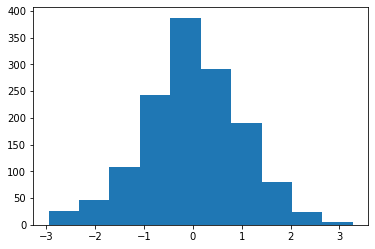

In [21]:
plt.hist(z_years.PeaceZ)

(array([ 10., 100., 298., 375., 261., 203., 100.,  49.,   4.,   1.]),
 array([-2.6131532 , -1.9552463 , -1.29733939, -0.63943249,  0.01847442,
         0.67638133,  1.33428823,  1.99219514,  2.65010204,  3.30800895,
         3.96591585]),
 <BarContainer object of 10 artists>)

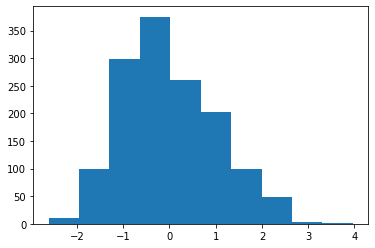

In [22]:
plt.hist(z_years.FatalZ)

(array([192., 207., 226., 214., 229., 127.,  95.,  42.,  22.,  47.]),
 array([-1.57487633, -1.13658516, -0.69829399, -0.26000283,  0.17828834,
         0.61657951,  1.05487067,  1.49316184,  1.93145301,  2.36974417,
         2.80803534]),
 <BarContainer object of 10 artists>)

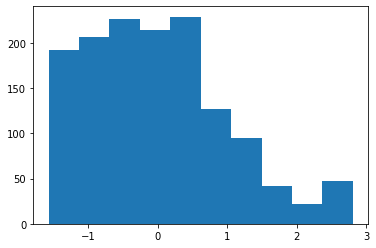

In [23]:
plt.hist(z_years.DaysZ)

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components = 2)

In [26]:
PCs = pca.fit_transform(z_years[['PeaceZ', 'FatalZ', 'DaysZ']])
PC_df1 = pd.DataFrame(PCs, columns = ['PC1', 'PC2'])
PC_df = pd.DataFrame(PCs, columns = ['PC1', 'PC2'])

In [27]:
PC_df['Country'] = z_years['Country']
PC_df['Country Label'] = z_years['Country Label']
PC_df['Year'] = z_years['Year']
PC_df[['PeaceZ', 'FatalZ', 'DaysZ']] = z_years[['PeaceZ', 'FatalZ', 'DaysZ']]

In [28]:
new_df = PC_df.copy()

In [29]:
new_df['Fact1'] = new_df['FatalZ'] - new_df['PeaceZ']
new_df['Fact2'] = new_df['DaysZ']

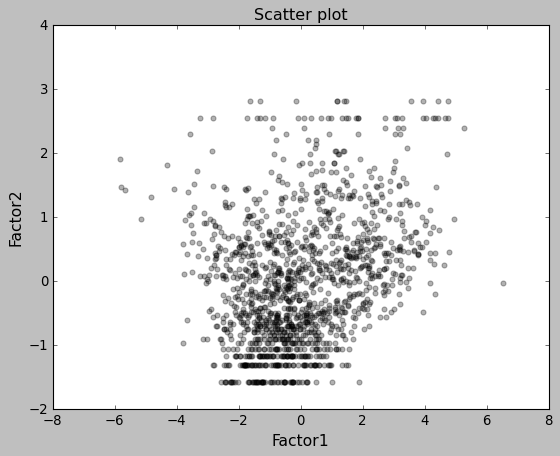

In [30]:
with plt.style.context('classic'):
    plt.scatter(new_df['Fact1'], new_df['Fact2'], c = 'k', alpha = 0.3)
    plt.title('Scatter plot')
    plt.xlabel('Factor1', fontsize=14)
    plt.ylabel('Factor2', fontsize=14)
    plt.savefig('All.png')